# This notebook is part of Section 5.5

## Import the Libraries

In [57]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import mglearn
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

## Visualize KNN for classification

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


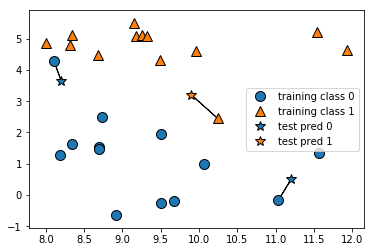

In [58]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


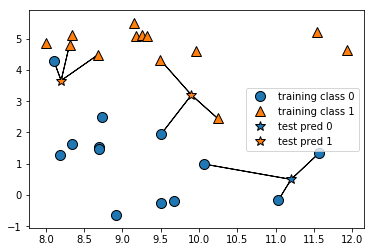

In [59]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

## Train a KNN classifier

In [60]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [61]:
clf = KNeighborsClassifier(n_neighbors=3)

In [62]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Make Prediction

In [63]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


# KNN Classification for Real-World Dataset

## Fix the Path

In [64]:
os.chdir('D:')
os.getcwd()

'D:\\'

## Import the dataset

In [65]:
diabetes=pd.read_csv('diabetes.csv')

In [66]:
print(diabetes.head())

   NTS  PGC  DBP  TSFT  INS   BMI    DPF  Age Class
0    6  148   72    35    0  33.6  0.627   50   Yes
1    1   85   66    29    0  26.6  0.351   31    No
2    8  183   64     0    0  23.3  0.672   32   Yes
3    1   89   66    23   94  28.1  0.167   21    No
4    0  137   40    35  168  43.1  2.288   33   Yes


## Remove zero entries

In [67]:
zero_not_accepted=['PGC','DBP','TSFT','INS','BMI']

In [68]:
for column in zero_not_accepted:
    diabetes[column]=diabetes[column].replace(0,np.NaN)
    mean=int(diabetes[column].mean(skipna=True))
    diabetes[column]=diabetes[column].replace(np.NaN,mean)

In [69]:
diabetes.head()

,NTS,PGC,DBP,TSFT,INS,BMI,DPF,Age,Class
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,Yes
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,No
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,No
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Yes


## Split the Dataset

In [70]:
X=diabetes.iloc[:,0:8]
Y=diabetes.iloc[:,8]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

## Scale the features

In [71]:
sc_X=StandardScaler() #!!!!!!
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

## Choose the K value

In [72]:
math.sqrt(len(Y_test))

15.198684153570664

## Train the Classifier

In [73]:
classifier=KNeighborsClassifier(n_neighbors=15,metric='euclidean')
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

## Make Predictions

In [74]:
Y_pred=classifier.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.7402597402597403


# KNN for Regression

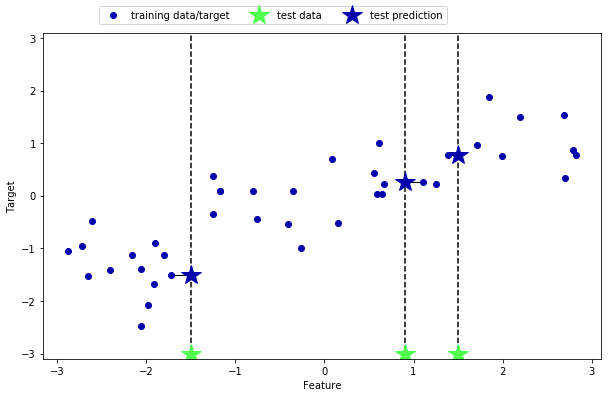

In [75]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

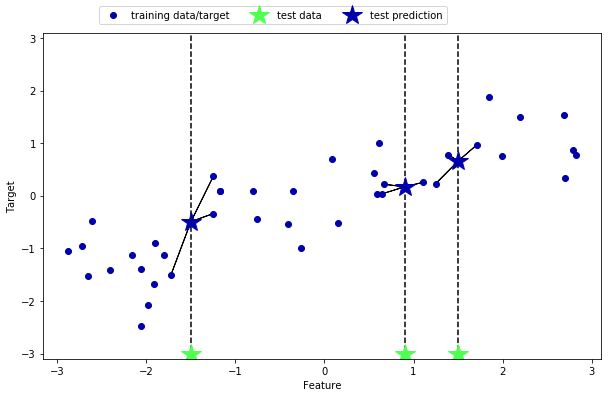

In [76]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

## Split the dataset

In [79]:
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [80]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.65


## Create a model and train it

In [82]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

## Compare the effect of different K

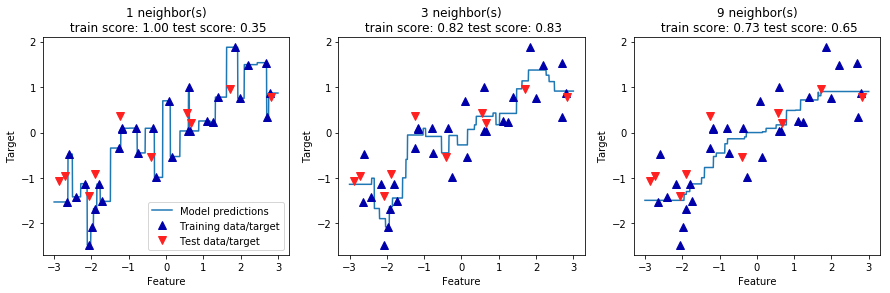

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
    "Test data/target"], loc="best")
plt.show()